In [1]:
import os
import torch

from package_hyper_network.utils_parameter_estimation \
    import EnsembleModel_MLP_MIMO_ND as Model

from utils.system_info import function_chdir_to_project_root
from utils.neural_network_read_data import function_get_training_data
from utils.figure_NN_results import function_visualize_predict_all_files
from utils.figure_NN_results import function_visualize_predict_single_file

function_chdir_to_project_root()

In [8]:
# Set parametesr
int_case = 5

dict_hyper_parameter = {
    'list_layer_neuron_numbers': [30, 30, 30, 30, 30],
    'int_number_used_dense_layer': 6 }

In [9]:

# set filenames based on case number
if int_case == 1:
    str_file_name_data = "OS1_UM12.npz"
    str_file_name_model \
        = "torch_model_inter_model_EM8_MIMO_OS1_UM12_ND6_30.pth"
if int_case == 2:
    str_file_name_data = "OS2_UM12.npz"
    str_file_name_model \
        = "torch_model_inter_model_EM8_MIMO_OS2_UM12_ND6_30.pth"
if int_case == 3:
    str_file_name_data = "OS3_UM12.npz"
    str_file_name_model \
        = "torch_model_inter_model_EM8_MIMO_OS3_UM12_ND6_30.pth"
if int_case == 4:
    str_file_name_data = "OS4_UM12.npz"
    str_file_name_model \
        = "torch_model_inter_model_EM8_MIMO_OS4_UM12_ND6_30.pth"
if int_case == 5:
    str_file_name_data = "OS1_UM96.npz"
    str_file_name_model \
        = "torch_model_inter_model_EM8_MIMO_OS1_UM96_ND6_30.pth"

In [10]:
tuple_function_return = function_get_training_data(str_file_name_data)
array2d_hyper_input = tuple_function_return[0]
array2d_model_input = tuple_function_return[1]
array2d_model_output = tuple_function_return[4]
list_path_file_loaded = tuple_function_return[5]
list_index_training = tuple_function_return[6]
list_index_testing = tuple_function_return[7]

array2d_hyper_input_training = array2d_hyper_input[list_index_training]
array2d_model_input_training = array2d_model_input[list_index_training]
array2d_model_output_training = array2d_model_output[list_index_training]
array2d_hyper_input_testing = array2d_hyper_input[list_index_testing]
array2d_model_input_testing = array2d_model_input[list_index_testing]
array2d_model_output_testing = array2d_model_output[list_index_testing]

if 
int_number_files = len(list_path_file_loaded)

int_number_sample = array2d_hyper_input.shape[0]

In [11]:
model = Model(
    8,
    hyper_input_size=array2d_hyper_input.shape[1],
    model_input_size=array2d_model_input.shape[1],
    model_output_size=array2d_model_output.shape[1],
    dict_hyper_parameter=dict_hyper_parameter)

path_model_save = "data/neural_network_models/" + str_file_name_model
assert os.path.exists(path_model_save)
state_dict = torch.load(path_model_save, map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
model = model.to("cpu")
model.eval()
print("STATUS: Loading weight done")

STATUS: Loading weight done


In [12]:
# array2d_hyper_input.shape
model_input = torch.from_numpy(
    array2d_model_input[list_index_testing, :]).to("cpu").type(torch.float32)
hyper_input = torch.from_numpy(
    array2d_hyper_input[list_index_testing, :]).to("cpu").type(torch.float32)
target_output = torch.from_numpy(
    array2d_model_output[list_index_testing, :]).to("cpu").type(torch.float32)

pred = model(model_input, hyper_input)

array2d_input = model_input.detach().numpy()
array2d_hyper = hyper_input.detach().numpy()
array2d_pred = pred.detach().numpy()
array2d_label = target_output.detach().numpy()

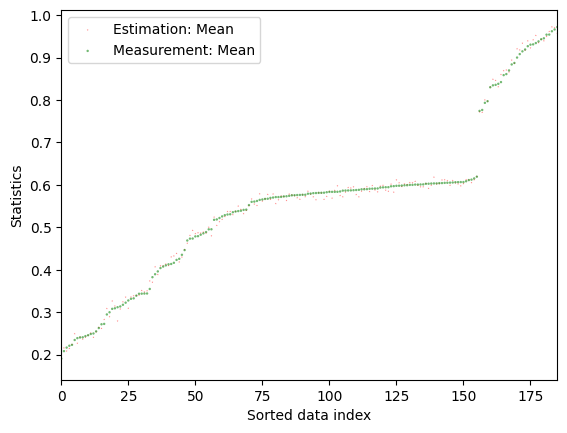

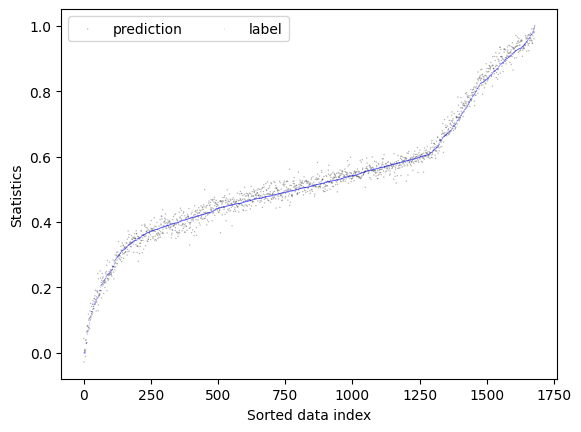

In [16]:
function_visualize_predict_single_file(
    array2d_label, array2d_pred, 9)
function_visualize_predict_all_files(array2d_label, array2d_pred)